# Reading the dataset and filtering out the columns

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
df1 = pd.read_excel('/labs/sarkerlab/srajwal/Migraine_project/dataset/Original_Data/Copy of sample_0811_part1_EJ_new_YC_022024-1_CC.xlsx')
df2 = pd.read_excel('/labs/sarkerlab/srajwal/Migraine_project/dataset/Original_Data/Copy of sample_0811_part2_Trivedi_YC_032524-2_final (1)_CC.xlsx')
df3 = pd.read_excel('/labs/sarkerlab/srajwal/Migraine_project/dataset/Original_Data/Copy of setB_full_new_YC_040424-2_finalCC.xlsx')

df3.rename(columns={'therapy':'keyword','sentiment':'label','tweet_text':'text'},inplace=True)

for index, row in df2.iterrows():
    if not pd.isnull(row['FINAL sentiment']):
        df2.at[index, 'label'] = row['FINAL sentiment']
    if not pd.isnull(row['efficacy']):
        df2.at[index, 'Efficacy'] = row['efficacy']
    if not pd.isnull(row['tolerability']):
        df2.at[index, 'Tolerability/Side effects'] = row['tolerability']
    if not pd.isnull(row['accessibility']):
        df2.at[index, 'Accessability (insurance denial, \ncomplain have to travel to get treatment)'] = row['accessibility']
    if not pd.isnull(row['others']):
        df2.at[index, 'Others'] = row['others']

for index, row in df3.iterrows():
    if not pd.isnull(row['FINAL sentiment']):
        df3.at[index, 'label'] = row['FINAL sentiment']
    if not pd.isnull(row['efficacy.1']):
        df3.at[index, 'efficacy'] = row['efficacy.1']
    if not pd.isnull(row['tolerability.1']):
        df3.at[index, 'tolerability'] = row['tolerability.1']
    if not pd.isnull(row['accessibility.1']):
        df3.at[index, 'accessibility'] = row['accessibility.1']
    if not pd.isnull(row['others.1']):
        df3.at[index, 'others'] = row['others.1']

df1.drop(['new_id','Unnamed: 4', 'Unnamed: 10'], axis=1, inplace=True)
df2.drop(['Notes','2nd reviewer disagreement', 'FINAL sentiment', 'efficacy',
       'tolerability', 'accessibility', 'others'],axis=1,inplace=True)
df3.drop(['new_id','notes (optional)','2nd reviewer disagreement', 'FINAL sentiment', 'efficacy.1',
       'tolerability.1', 'accessibility.1', 'others.1'],axis=1,inplace=True)

df1.columns = map(str.lower, df1.columns)
df2.columns = map(str.lower, df2.columns)
df3.columns = map(str.lower, df3.columns)

df1.rename(columns={'tolerability/side effects':'tolerability', 'accessability (insurance denial, \ncomplain have to travel to get treatment)':'accessibility'},inplace=True)
df2.rename(columns={'tolerability/side effects':'tolerability', 'accessability (insurance denial, \ncomplain have to travel to get treatment)':'accessibility'},inplace=True)


df3['label'] = df3['label'].replace({'Negative': -1, 'Neutral': 0, 'Positive': 1})
df3['efficacy'] = df3['efficacy'].replace({'Negative': -1, 'Neutral': 0, 'Positive': 1})
df3['tolerability'] = df3['tolerability'].replace({'Negative': -1, 'Neutral': 0, 'Positive': 1})
df3['accessibility'] = df3['accessibility'].replace({'Negative': -1, 'Neutral': 0, 'Positive': 1})
df3['others'] = df3['others'].replace({'Negative': -1, 'Neutral': 0, 'Positive': 1})

print(f"################ FIRST EXCEL SHEET DATA ################\ndf1 columns: {df1.columns},\ndf1 shape: {df1.shape}\n")
print(f"################ SECOND EXCEL SHEET DATA ################\ndf2 columns: {df2.columns},\ndf2 shape: {df2.shape}\n")
print(f"################ THIRD EXCEL SHEET DATA ################\ndf3 columns: {df3.columns},\ndf3 shape: {df3.shape}\n")

################ FIRST EXCEL SHEET DATA ################
df1 columns: Index(['tweet_id', 'text', 'keyword', 'label', 'efficacy', 'tolerability',
       'accessibility', 'others'],
      dtype='object'),
df1 shape: (988, 8)

################ SECOND EXCEL SHEET DATA ################
df2 columns: Index(['tweet_id', 'text', 'keyword', 'label', 'efficacy', 'tolerability',
       'accessibility', 'others'],
      dtype='object'),
df2 shape: (1007, 8)

################ THIRD EXCEL SHEET DATA ################
df3 columns: Index(['tweet_id', 'text', 'keyword', 'label', 'efficacy', 'tolerability',
       'accessibility', 'others'],
      dtype='object'),
df3 shape: (983, 8)



In [4]:
combined_df = pd.concat([df1, df2, df3]).drop_duplicates(subset=['tweet_id', 'keyword'])
combined_df.reset_index(drop=True, inplace=True)
print(f"Shape of combined dataframe: {combined_df.shape}")

Shape of combined dataframe: (2791, 8)


In [4]:
combined_df.to_csv('/labs/sarkerlab/srajwal/Migraine_project/dataset/combined_dataset.csv',index=False)

# EDA on the Dataset

In [5]:
combined_df.columns

Index(['tweet_id', 'text', 'keyword', 'label', 'efficacy', 'tolerability',
       'accessibility', 'others'],
      dtype='object')

In [ ]:
combined_df.shape

In [6]:
print("Unique medication/therapy keywords:", sorted(combined_df['keyword'].unique()))

Unique medication/therapy keywords: [' amerge', 'aimovig', 'ajovy', 'almotriptan', 'amerge', 'atogepant', 'axert', 'botox', 'elavil', 'eletriptan', 'emgality', 'eptinezumab', 'erenumab', 'fremanezumab', 'frova', 'frovatriptan', 'galcanezumab', 'imitrex', 'inderal', 'maxalt', 'naratriptan', 'nurtec', 'qulipta', 'relpax', 'rimegepant', 'rizatriptan', 'sumatriptan', 'sumatriptan ', 'topamax', 'ubrelvy', 'ubrogepant', 'vyepti', 'zolmitriptan', 'zomig']


In [7]:
def plot_graph(colname):
    keyword_counts = combined_df[colname].value_counts()
    plt.figure(figsize=(10, 6))
    keyword_counts.plot(kind='barh')
    plt.title(f'Frequency of values in column: {colname}')
    plt.xlabel('Frequency')
    plt.ylabel(colname)
    plt.grid()
    plt.show()

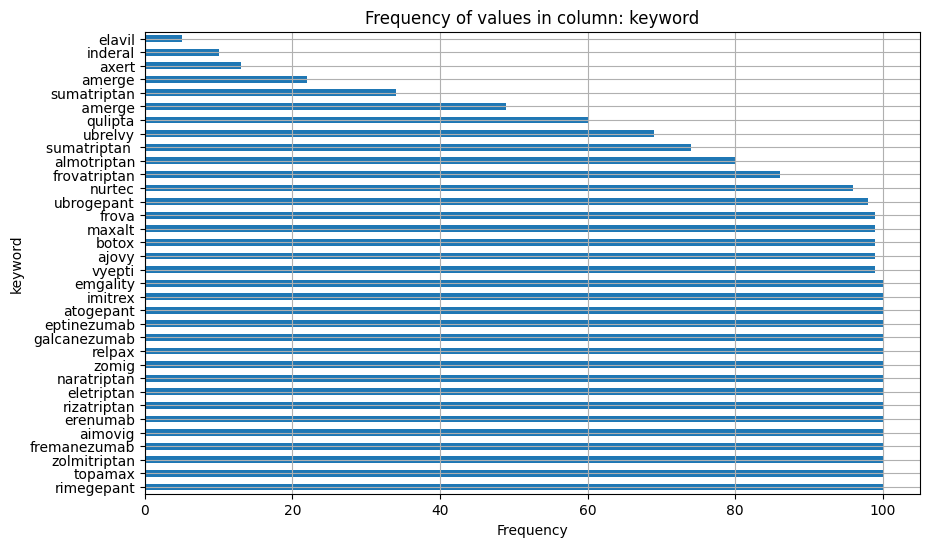

In [8]:
plot_graph('keyword')

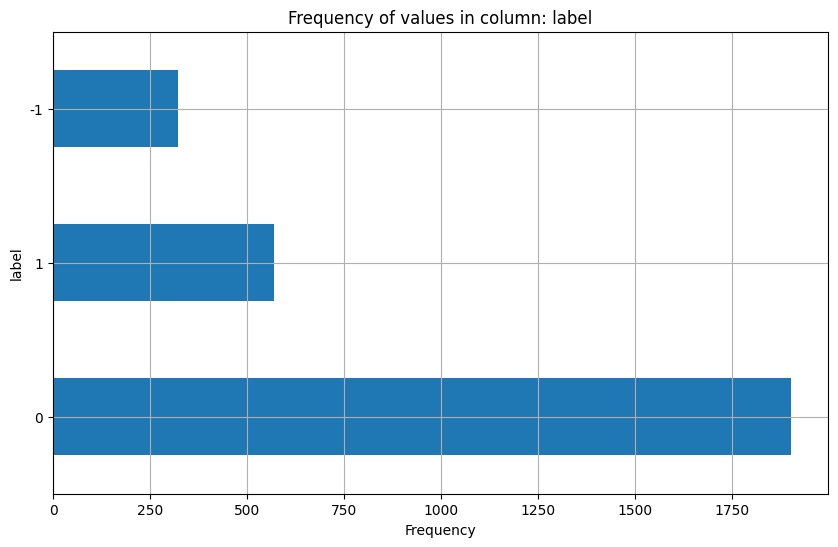

In [9]:
plot_graph('label')

In [10]:
for colname in ['label', 'efficacy', 'tolerability','accessibility', 'others']:
    print(combined_df[colname].value_counts(dropna=False),"\n")

label
 0    1901
 1     568
-1     322
Name: count, dtype: int64 

efficacy
 NaN    1130
 0.0     948
 1.0     555
-1.0     158
Name: count, dtype: int64 

tolerability
 NaN    1397
 0.0    1176
-1.0     168
 1.0      50
Name: count, dtype: int64 

accessibility
 NaN    1449
 0.0    1259
-1.0      74
 1.0       9
Name: count, dtype: int64 

others
 NaN    1486
 0.0    1263
-1.0      23
 1.0      19
Name: count, dtype: int64 



In [7]:
train_df, temp_df = train_test_split(combined_df, test_size=0.2, stratify=combined_df['labels'])
dev_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['labels'])

train_df.reset_index(drop=True, inplace=True)
dev_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

train_df.to_csv('/labs/sarkerlab/srajwal/Migraine_project/dataset/train.csv',index=False)
dev_df.to_csv('/labs/sarkerlab/srajwal/Migraine_project/dataset/dev.csv',index=False)
test_df.to_csv('/labs/sarkerlab/srajwal/Migraine_project/dataset/test.csv',index=False)

In [8]:
train_df.sample(4)

,text,labels
1275,<user> <user> i'm terrified of losing medicaid...,-1
2031,<user> i’m on 20 mg amitriptyline atm don’t re...,0
481,if anybody needs a recipe on how to give thems...,0
1968,<user> <user> <user> i take a daily triptan (a...,0
